<a href="https://colab.research.google.com/github/ahhuang007/Sebastian/blob/main/Sebastian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ahhuang007/Sebastian.git

Cloning into 'Sebastian'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 214 (delta 67), reused 205 (delta 58), pack-reused 0
Receiving objects: 100% (214/214), 51.30 MiB | 32.47 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [2]:
!pwd

/content


In [3]:
%cd Sebastian/gym-seb

/content/Sebastian/gym-seb


In [5]:
!pip install -e .

Obtaining file:///content/Sebastian/gym-seb
  Using cached pybullet-3.1.7.tar.gz (79.0 MB)
  Created wheel for pybullet: filename=pybullet-3.1.7-cp37-cp37m-linux_x86_64.whl size=89750866 sha256=b53fcc2b1f82a7ef6aa8887a61312eb178dbc15e57c5bfc71c97f1a4e2de33d8
  Stored in directory: /root/.cache/pip/wheels/70/1c/62/86c8b68885c24123d87c5392d6678aa2b68a1796c8113e1aa6
Successfully built pybullet
  Running setup.py develop for gym-seb


Restart runtime after this so the environment will show up

In [1]:
%cd Sebastian

/content/Sebastian


Just copying the gym_test.py code here because it's the main stuff I need to edit

In [2]:
import gym
from agent import Agent
import numpy as np

In [3]:
import gym_seb

env = gym.make('seb-v0')
agent = Agent(input_dims=env.observation_space.shape, env=env,
            n_actions=env.action_space.shape[0])

best_reward = 0
scores = []
load_checkpoint = False
epochs = 250

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
if load_checkpoint:
    n_steps = 0
    while n_steps <= agent.batch_size:
        observation = env.reset()
        action = env.action_space.sample()
        observation_, reward, info = env.step(action)
        agent.remember(observation, action, reward, observation_)
        n_steps += 1
    agent.learn()
    agent.load_models()
    evaluate = True
else:
    evaluate = False

In [5]:
for i in range(epochs):
    observation = env.reset()
    score = 0
    iterations = 2000
    for j in range(iterations):
        action = agent.choose_action(observation, evaluate)
        observation_, reward, info = env.step(action)
        score += reward
        agent.remember(observation, action, reward, observation_)
        if not load_checkpoint:
            agent.learn()
        observation = observation_

    scores.append(score)
    avg_score = np.mean(scores[-100:])
    #avg_score = np.mean(scores[0:])

    if avg_score > best_reward:
        best_reward = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.4f' % score, 'avg score %.4f' % avg_score)

episode  0 score -124.3122 avg score -124.3122
episode  1 score -87.6841 avg score -105.9982
episode  2 score -115.8821 avg score -109.2928
episode  3 score -118.2870 avg score -111.5414
episode  4 score -8.3843 avg score -90.9100
episode  5 score -17.0074 avg score -78.5929
episode  6 score -24.1015 avg score -70.8084
episode  7 score -81.5100 avg score -72.1461
episode  8 score -149.5488 avg score -80.7464
episode  9 score -107.0352 avg score -83.3753
episode  10 score -121.0517 avg score -86.8004
episode  11 score -25.9604 avg score -81.7304
episode  12 score -317.6506 avg score -99.8781
episode  13 score -7.7099 avg score -93.2947
episode  14 score -5.1449 avg score -87.4180
episode  15 score -13.8031 avg score -82.8171
episode  16 score -18.2600 avg score -79.0196
episode  17 score -16.6518 avg score -75.5547
episode  18 score -19.5803 avg score -72.6087
episode  19 score -52.6564 avg score -71.6111
episode  20 score -26.7770 avg score -69.4761
episode  21 score -67.9371 avg score

KeyboardInterrupt: ignored

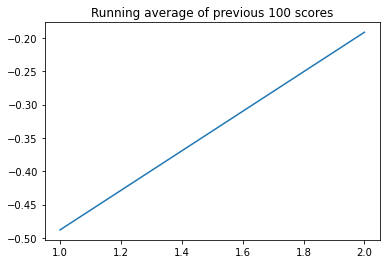

In [ ]:
import matplotlib.pyplot as plt

if not load_checkpoint:
    x = [i+1 for i in range(epochs)]
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')
    #plt.savefig(figure_file)
      

In [ ]:
env.close()